<a href="https://colab.research.google.com/github/colin-hehir/Forecasting-of-CO2-Emissions/blob/main/Time_Series_Consensus_CO2_Emissions_per_Capita_Motifs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STUMPY Matrix Profile code available at: https://towardsdatascience.com/the-matrix-profile-e4a679269692 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive =GoogleDrive(gauth)

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':'1r9Rk2V8aVYansKrzpXaR9lq8mGOAgsDx'})
downloaded.GetContentFile('Original_Dataset_owid-co2-data.csv')
Original_C02_Greenhouse_Gases_Dataset = pd.read_csv('Original_Dataset_owid-co2-data.csv')

In [ ]:
continent_data =  Original_C02_Greenhouse_Gases_Dataset[Original_C02_Greenhouse_Gases_Dataset.country.isin(['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]

In [ ]:
!pip install scipy>=1.5
!pip install stumpy

In [ ]:
%matplotlib inline
import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle, combinations
from matplotlib.patches import Rectangle
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.special import comb
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['xtick.direction'] = 'out'

In [ ]:
import plotly.express as plt
plt.line(continent_data, x = 'year', y = 'co2_per_capita', color='country')

In [ ]:
downloaded = drive.CreateFile({'id':'1ZoFm7mKLVaVuNpzaB8HXpCgOW7AVW9BY'})
downloaded.GetContentFile('Continent_Data_CO2_Per_Capita.csv')
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
for continent in continents:
 data = {}
data['Africa'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,1].values
data['Asia'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,2].values
data['Europe'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,3].values
data['North America'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,4].values
data['Oceania'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,5].values
data['South America'] = pd.read_csv('Continent_Data_CO2_Per_Capita.csv').iloc[:,6].values

colors = {'Africa': 'tab:blue', 'Asia': 'tab:red', 'Europe': 'tab:cyan', 'North America': 'tab:purple', 'Oceania': 'tab:yellow', 'South America': 'tab:green'}

In [ ]:
data

{'Africa': array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan, 0.005, 0.008, 0.01 , 0.01 , 0.017, 0.028,
        0.062, 0.062, 0.099, 0.366, 0.49 , 0.664, 0.838, 0.93 , 1.164,
        1.048, 0.436, 0.721, 1.057, 1.169, 1.296, 1.467, 1.646, 1.785,
        1.819, 2.052, 2.283, 0.892, 0.937, 1.01 , 0.994, 0.466, 0.461,
        0.497, 0.48 , 0.511, 0.461, 0.454, 0.399, 0.477, 0.496, 0.5

In [ ]:
m = 20
bsf_radius, bsf_Ts_idx, bsf_subseq_idx = stumpy.ostinato(list(data.values()), m)
print(f'Found best radius {np.round(bsf_radius, 2)} in time series {bsf_Ts_idx} starting at subsequence index location {bsf_subseq_idx}.')

Found best radius 0.7 in time series 1 starting at subsequence index location 197.


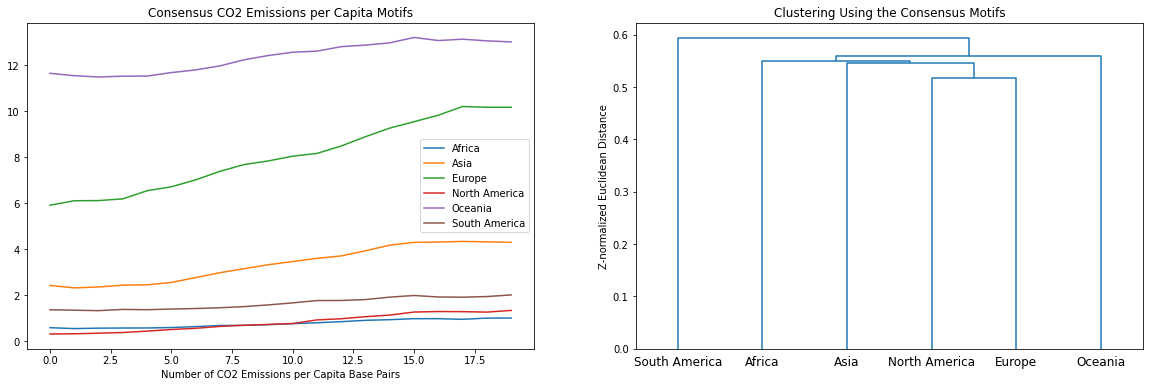

In [ ]:
consensus_motifs = {}
best_motif = list(data.items())[bsf_Ts_idx][1][bsf_subseq_idx : bsf_subseq_idx + m]
for i, (k, v) in enumerate(data.items()):
    if i == bsf_Ts_idx:
        consensus_motifs[k] = best_motif
    else:
        idx = np.argmin(stumpy.core.mass(best_motif, v))
        consensus_motifs[k] = v[idx : idx + m]

fig, ax = plt.subplots(ncols=2)
# plot the consensus motifs
for continents, motif in consensus_motifs.items():
    ax[0].plot(motif, label=continents)
ax[0].legend()
# cluster consensus motifs
dp = np.zeros(int(comb(6, 2)))
for i, motif in enumerate(combinations(list(consensus_motifs.values()), 2)):
    dp[i] = stumpy.core.mass(motif[0], motif[1])
Z = linkage(dp, optimal_ordering=True)
dendrogram(Z, labels=[k for k in consensus_motifs.keys()])
ax[0].set_title('Consensus CO2 Emissions per Capita Motifs')
ax[0].set_xlabel('Number of CO2 Emissions per Capita Base Pairs')
ax[1].set_title('Clustering Using the Consensus Motifs')
ax[1].set_ylabel('Z-normalized Euclidean Distance')
plt.show()